In [13]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np

## Load and Prepare the dataset

Import data from an example run and prepare it for further analysis.

In [3]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


The dataset zoomed around the cavity frequency

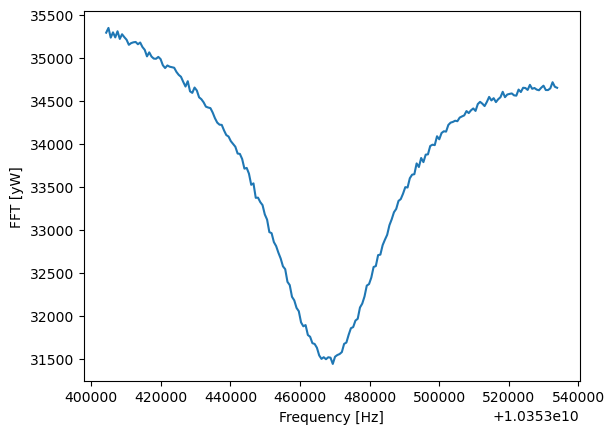

In [4]:
plt.plot(freq, fft)
plt.ylabel('FFT [yW]')
plt.xlabel('Frequency [Hz]')
plt.show()

## Fits

### Background Fit

First fit background and check the distribution of residuals.

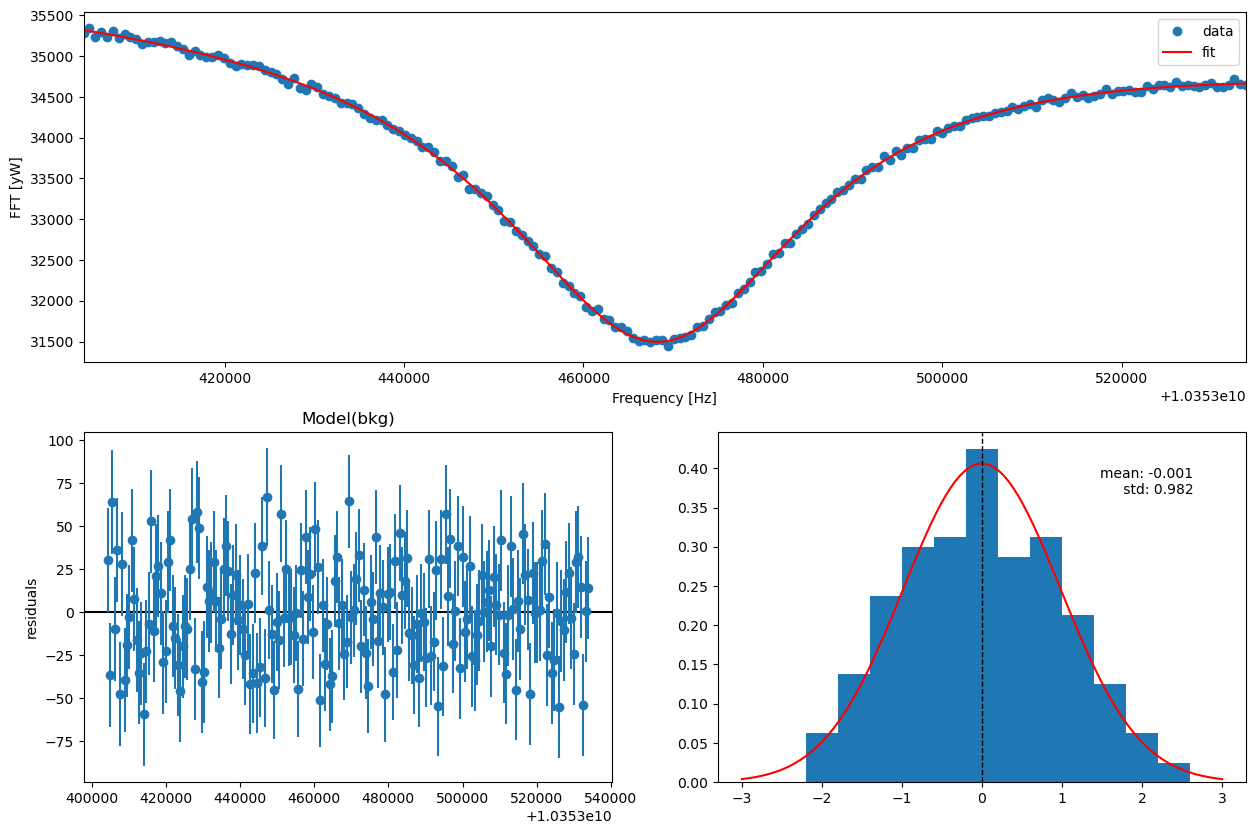

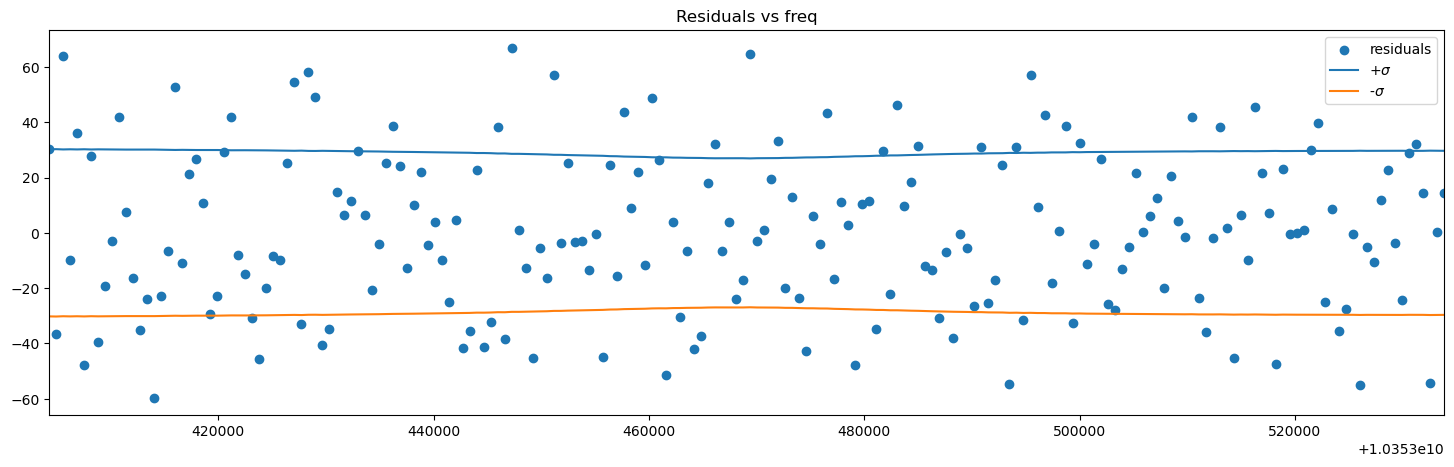

In [5]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

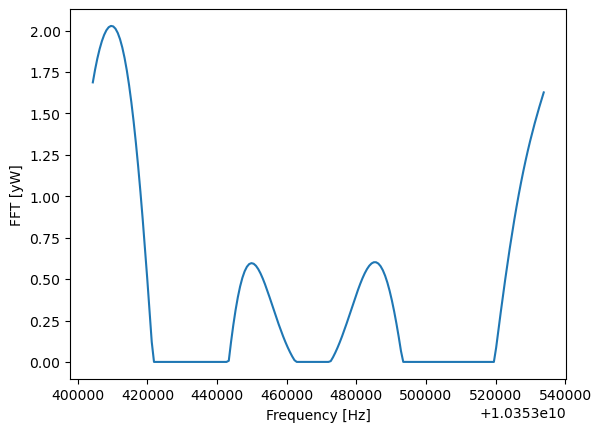

In [7]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]
    
plt.plot(freq, mu_fit)
plt.ylabel('FFT [yW]')
plt.xlabel('Frequency [Hz]')
plt.show()

Check fit results for maximum $\mu$ obtained.

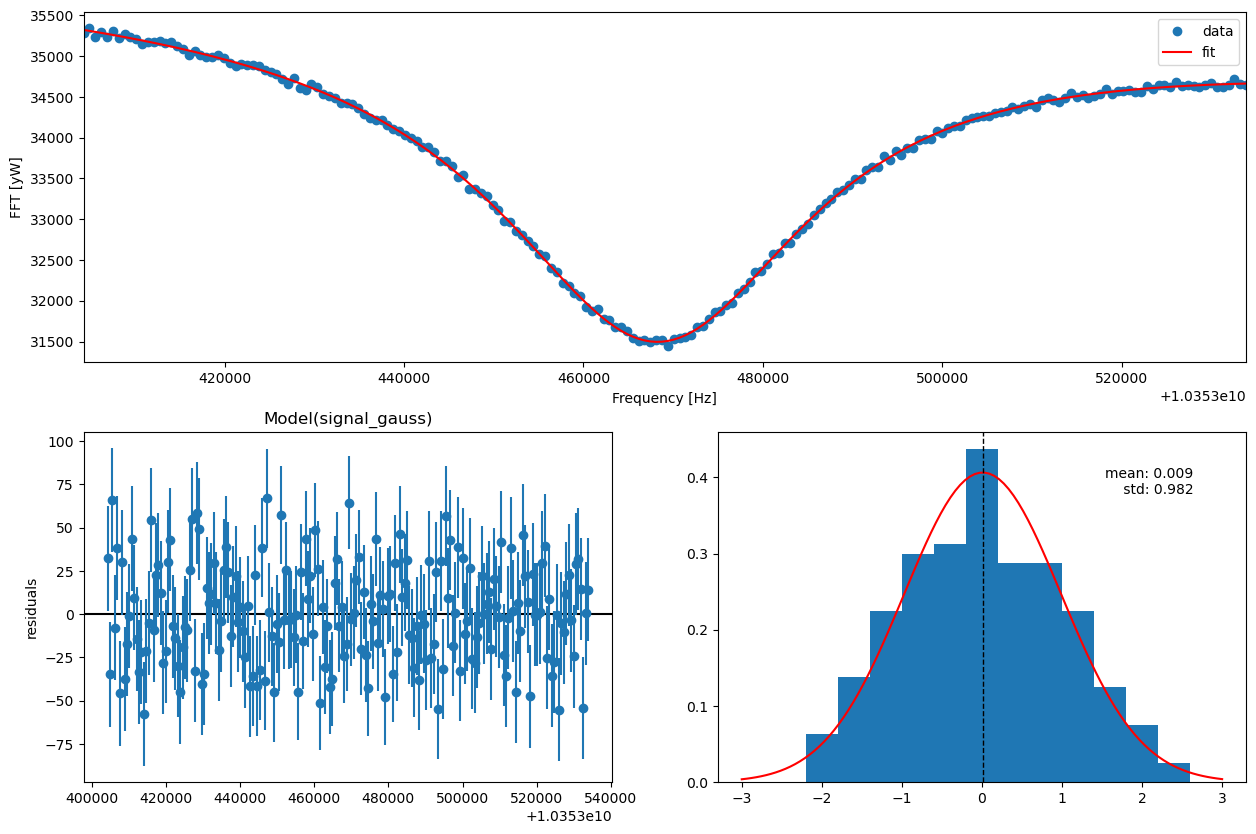

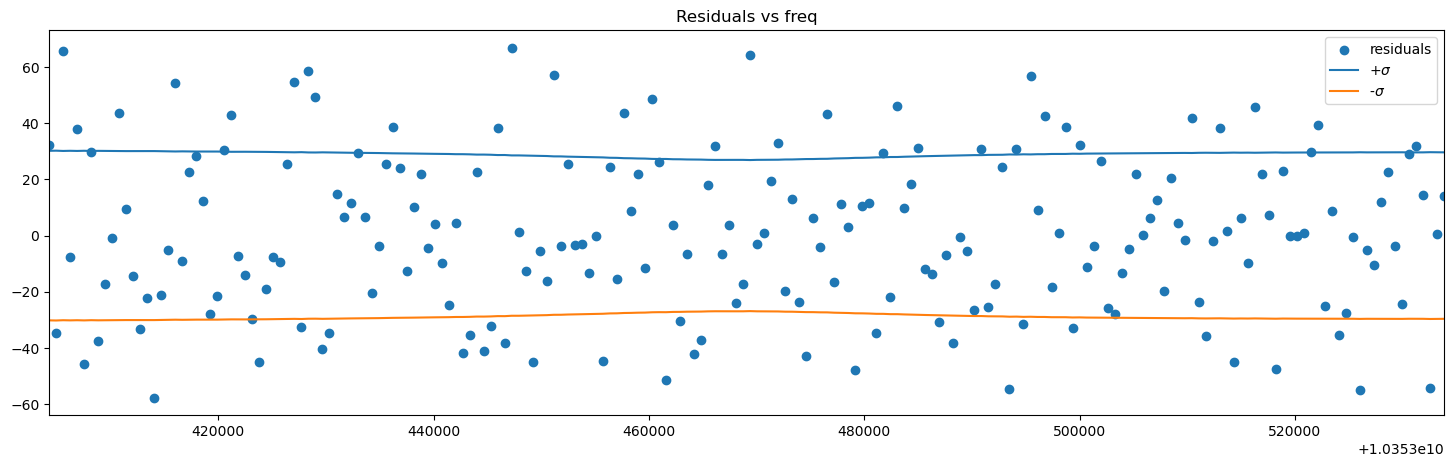

In [8]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)

fits.plot_fit(freq, fft, weights, res_sig)


If you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

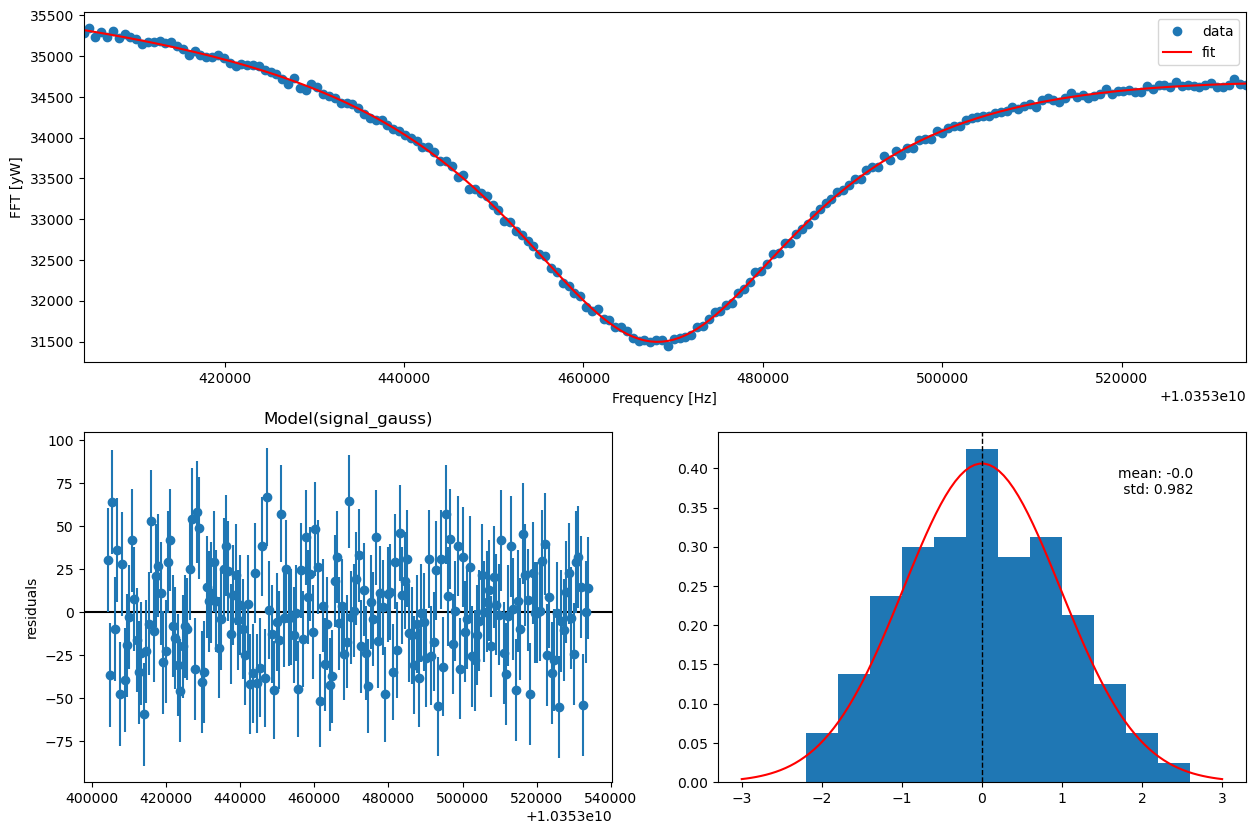

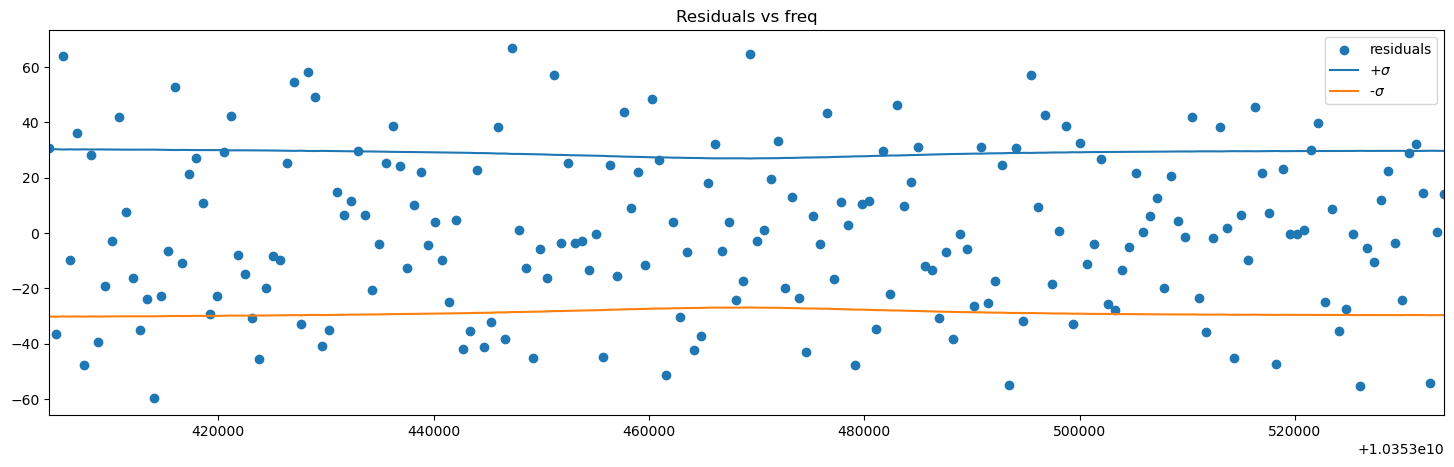

In [9]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## Statistics

Compute likelihood ratio over observed data for the latter fit.

In [10]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.010000322994528688

### Significance

Compute significance as a function of the center of the signal.

In [11]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=np.array([]),
                          signal=fits.signal_gauss, n_toy=500,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='../db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40
Step: 60
Step: 80
Step: 100
Step: 120
Step: 140
Step: 160
Step: 180
Step: 200


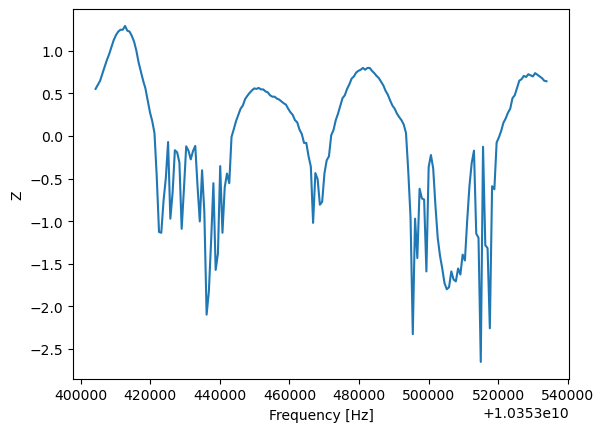

In [40]:
plt.plot(freq, z_tot)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Z')
plt.show()

In [28]:
print(f"We get maximum significance z_max = {round(np.max(z_tot),2)}")
print(f"with a signal centered in f = {freq[np.argmax(z_tot)]} Hz")

We get maximum significance z_max = 1.29
with a signal centered in f = 10353412760.416666 Hz


Here are some example of the likelihood ratio distribution for different $x_0$: the maximum value of $\hat{\mu}$, the center of the cavity and a secondary peak of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


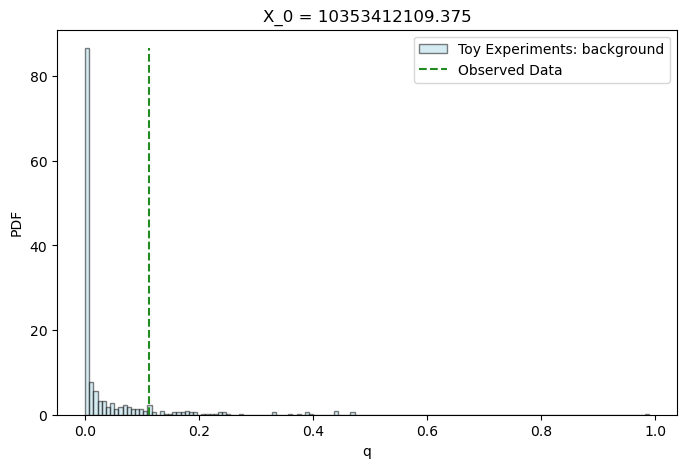

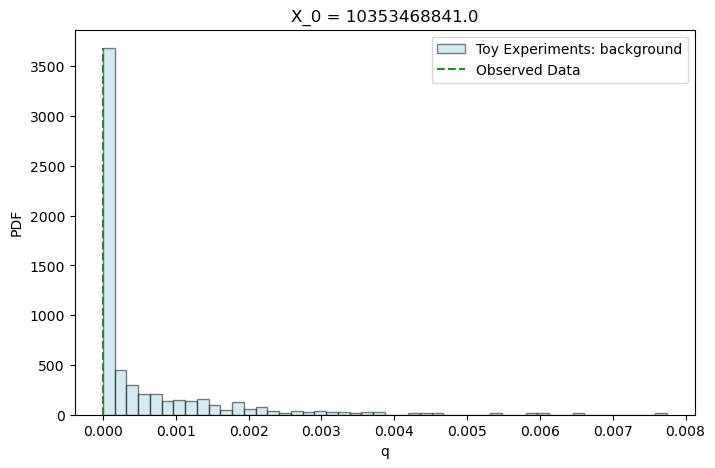

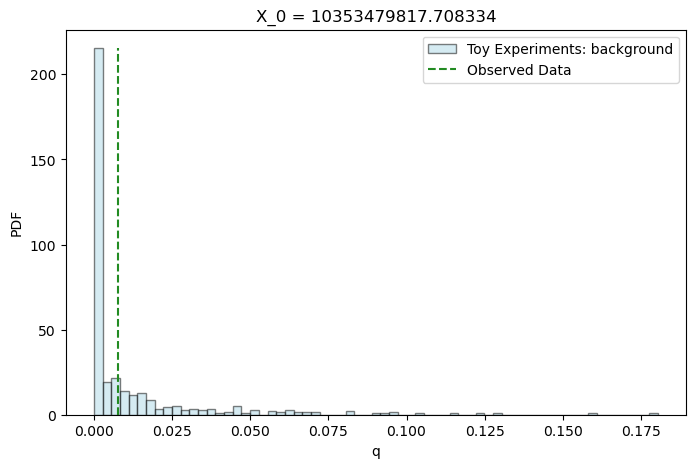

In [29]:
z, _ = stat.stat_test(run=395, x_0=[10353412109.375, center, freq[116]], mu_fix=np.array([]),
                      signal=fits.signal_gauss, n_toy=500,
                      calc_z=True, calc_CI=False, draw=True, verbose=False, path='../db/')

In [32]:
print('Corresponding to a z:',z)

Corresponding to a z: [ 1.29303198 -0.79261872  0.50722066]


### Confidence Interval

Compute $\mu^{95\% CL}$ for the frequency where we have the maximum of $\hat{\mu}$.

In [33]:
mu_fix=np.array([67,56,50,44,33,26,15])
x0=freq[range(0, 50,5)].values

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  67    q(mu)_obs = 68.57463903294456 
p_mu = 0.006   p_b = 0.709   ratio = 0.00846262341325811 

Mu:  56    q(mu)_obs = 47.41653279429147 
p_mu = 0.015   p_b = 0.708   ratio = 0.0211864406779661 

Mu:  50    q(mu)_obs = 37.51253760093323 
p_mu = 0.021   p_b = 0.708   ratio = 0.029661016949152547 

Mu:  44    q(mu)_obs = 28.76516304574625 
p_mu = 0.059   p_b = 0.708   ratio = 0.08333333333333333 

Mu:  33    q(mu)_obs = 15.735533678570391 
p_mu = 0.146   p_b = 0.708   ratio = 0.2062146892655367 

Mu:  26    q(mu)_obs = 9.472477922495727 
p_mu = 0.255   p_b = 0.708   ratio = 0.36016949152542377 

Mu:  15    q(mu)_obs = 2.8225311798082657 
p_mu = 0.45   p_b = 0.707   ratio = 0.6364922206506366 



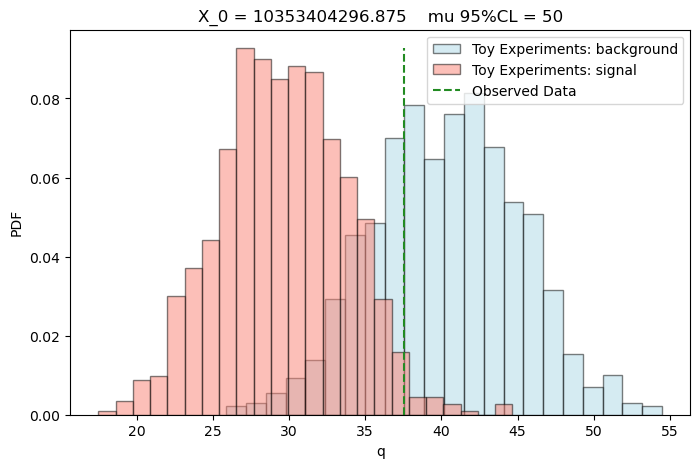

Mu:  67    q(mu)_obs = 90.36057015140841 
p_mu = 0.006   p_b = 0.823   ratio = 0.007290400972053464 

Mu:  56    q(mu)_obs = 62.374505931054046 
p_mu = 0.052   p_b = 0.823   ratio = 0.06318347509113001 

Mu:  50    q(mu)_obs = 49.28409228558485 
p_mu = 0.082   p_b = 0.823   ratio = 0.09963547995139733 

Mu:  44    q(mu)_obs = 37.73049541373575 
p_mu = 0.123   p_b = 0.823   ratio = 0.149453219927096 

Mu:  33    q(mu)_obs = 20.544843808946553 
p_mu = 0.285   p_b = 0.823   ratio = 0.3462940461725395 

Mu:  26    q(mu)_obs = 12.304132502532411 
p_mu = 0.427   p_b = 0.823   ratio = 0.5188335358444714 

Mu:  15    q(mu)_obs = 3.5964122990230862 
p_mu = 0.596   p_b = 0.823   ratio = 0.724179829890644 



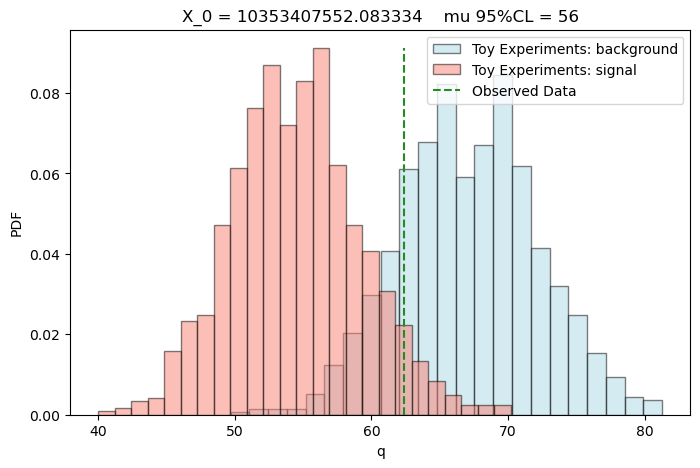

Mu:  67    q(mu)_obs = 108.53565154194575 
p_mu = 0.053   p_b = 0.898   ratio = 0.05902004454342984 

Mu:  56    q(mu)_obs = 74.90601825607018 
p_mu = 0.137   p_b = 0.898   ratio = 0.15256124721603564 

Mu:  50    q(mu)_obs = 59.17716229653479 
p_mu = 0.178   p_b = 0.898   ratio = 0.19821826280623606 

Mu:  44    q(mu)_obs = 45.29597913289945 
p_mu = 0.254   p_b = 0.898   ratio = 0.28285077951002224 

Mu:  33    q(mu)_obs = 24.651386719036054 
p_mu = 0.431   p_b = 0.898   ratio = 0.47995545657015587 

Mu:  26    q(mu)_obs = 14.754822341396448 
p_mu = 0.549   p_b = 0.898   ratio = 0.611358574610245 

Mu:  15    q(mu)_obs = 4.303189401258351 
p_mu = 0.742   p_b = 0.898   ratio = 0.8262806236080178 



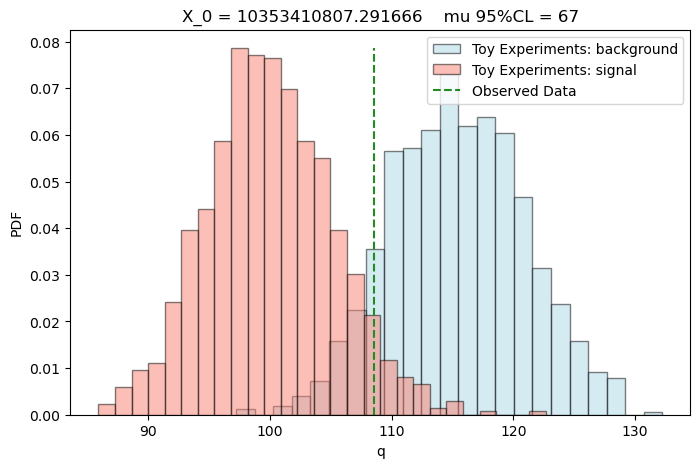

Mu:  67    q(mu)_obs = 121.93440888576538 
p_mu = 0.036   p_b = 0.863   ratio = 0.041714947856315174 

Mu:  56    q(mu)_obs = 84.28667085473717 
p_mu = 0.088   p_b = 0.862   ratio = 0.10208816705336426 

Mu:  50    q(mu)_obs = 66.66613818777478 
p_mu = 0.14   p_b = 0.863   ratio = 0.16222479721900349 

Mu:  44    q(mu)_obs = 51.10526117206473 
p_mu = 0.206   p_b = 0.863   ratio = 0.23870220162224795 

Mu:  33    q(mu)_obs = 27.93233300148904 
p_mu = 0.377   p_b = 0.863   ratio = 0.4368482039397451 

Mu:  26    q(mu)_obs = 16.79853659883065 
p_mu = 0.51   p_b = 0.863   ratio = 0.5909617612977984 

Mu:  15    q(mu)_obs = 4.987513513046451 
p_mu = 0.669   p_b = 0.863   ratio = 0.7752027809965238 



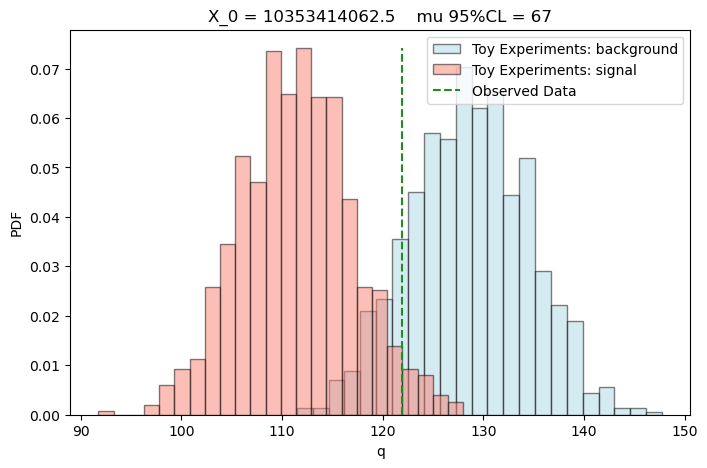

Mu:  67    q(mu)_obs = 131.49870463877937 
p_mu = 0.0   p_b = 0.758   ratio = 0.0 

Mu:  56    q(mu)_obs = 91.22290047031083 
p_mu = 0.011   p_b = 0.758   ratio = 0.014511873350923481 

Mu:  50    q(mu)_obs = 72.3424058828914 
p_mu = 0.021   p_b = 0.758   ratio = 0.02770448548812665 

Mu:  44    q(mu)_obs = 55.6441539395596 
p_mu = 0.039   p_b = 0.758   ratio = 0.051451187335092345 

Mu:  33    q(mu)_obs = 30.704674012434452 
p_mu = 0.129   p_b = 0.757   ratio = 0.17040951122853368 

Mu:  26    q(mu)_obs = 18.661579846522727 
p_mu = 0.24   p_b = 0.756   ratio = 0.31746031746031744 

Mu:  15    q(mu)_obs = 5.7596498438681465 
p_mu = 0.44   p_b = 0.756   ratio = 0.582010582010582 



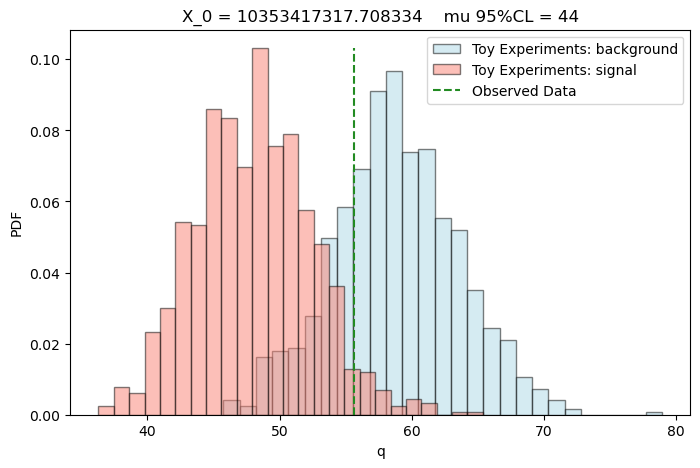

Mu:  67    q(mu)_obs = 138.9002328542092 
p_mu = 0.0   p_b = 0.552   ratio = 0.0 

Mu:  56    q(mu)_obs = 96.86110231865541 
p_mu = 0.0   p_b = 0.552   ratio = 0.0 

Mu:  50    q(mu)_obs = 77.10824035717701 
p_mu = 0.001   p_b = 0.552   ratio = 0.0018115942028985505 

Mu:  44    q(mu)_obs = 59.600804213835545 
p_mu = 0.001   p_b = 0.552   ratio = 0.0018115942028985505 

Mu:  33    q(mu)_obs = 33.34203534616131 
p_mu = 0.022   p_b = 0.552   ratio = 0.03985507246376811 

Mu:  26    q(mu)_obs = 20.570122206744372 
p_mu = 0.059   p_b = 0.552   ratio = 0.10688405797101448 

Mu:  15    q(mu)_obs = 6.69706064036086 
p_mu = 0.182   p_b = 0.552   ratio = 0.3297101449275362 



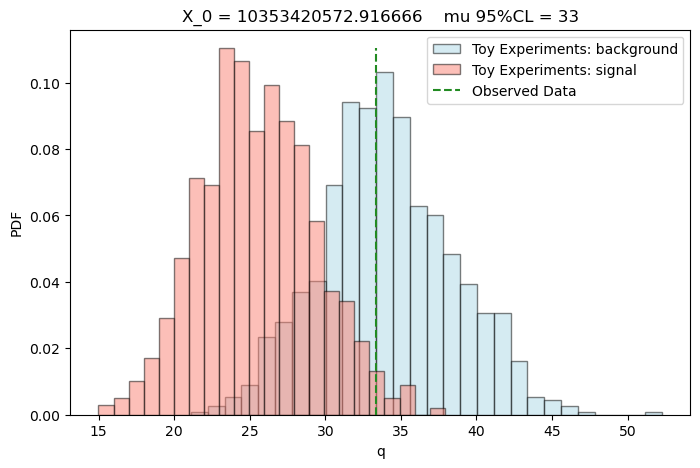

Mu:  67    q(mu)_obs = 145.17021683057283 
p_mu = 0.0   p_b = 0.385   ratio = 0.0 

Mu:  56    q(mu)_obs = 101.81670009783329 
p_mu = 0.0   p_b = 0.385   ratio = 0.0 

Mu:  50    q(mu)_obs = 81.39387607744561 
p_mu = 0.0   p_b = 0.385   ratio = 0.0 

Mu:  44    q(mu)_obs = 63.24966552857677 
p_mu = 0.001   p_b = 0.385   ratio = 0.0025974025974025974 

Mu:  33    q(mu)_obs = 35.90974602004371 
p_mu = 0.003   p_b = 0.385   ratio = 0.007792207792207792 

Mu:  26    q(mu)_obs = 22.50800743727723 
p_mu = 0.013   p_b = 0.385   ratio = 0.033766233766233764 

Mu:  15    q(mu)_obs = 7.736743363649339 
p_mu = 0.085   p_b = 0.385   ratio = 0.2207792207792208 



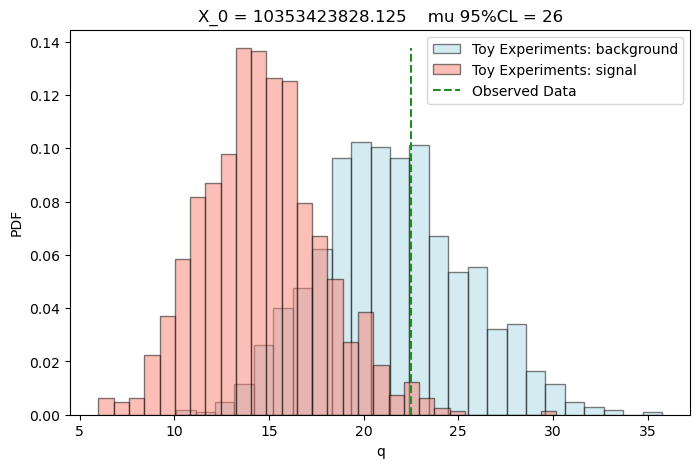

Mu:  67    q(mu)_obs = 150.26860045330977 
p_mu = 0.0   p_b = 0.277   ratio = 0.0 

Mu:  56    q(mu)_obs = 105.8874005159164 
p_mu = 0.0   p_b = 0.277   ratio = 0.0 

Mu:  50    q(mu)_obs = 84.93550476100245 
p_mu = 0.0   p_b = 0.277   ratio = 0.0 

Mu:  44    q(mu)_obs = 66.28447263454973 
p_mu = 0.0   p_b = 0.277   ratio = 0.0 

Mu:  33    q(mu)_obs = 38.07323919403302 
p_mu = 0.001   p_b = 0.277   ratio = 0.003610108303249097 

Mu:  26    q(mu)_obs = 24.15606283016814 
p_mu = 0.004   p_b = 0.277   ratio = 0.014440433212996389 

Mu:  15    q(mu)_obs = 8.636259599562436 
p_mu = 0.04   p_b = 0.277   ratio = 0.1444043321299639 



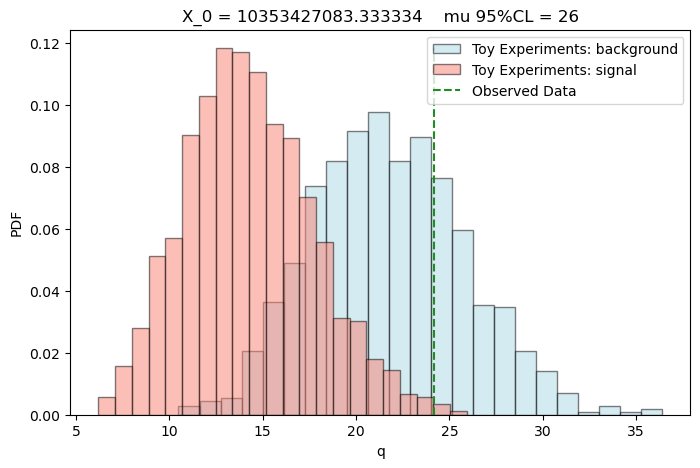

Mu:  67    q(mu)_obs = 153.65335944970502 
p_mu = 0.0   p_b = 0.205   ratio = 0.0 

Mu:  56    q(mu)_obs = 108.53884948262294 
p_mu = 0.0   p_b = 0.205   ratio = 0.0 

Mu:  50    q(mu)_obs = 87.2162800498354 
p_mu = 0.0   p_b = 0.205   ratio = 0.0 

Mu:  44    q(mu)_obs = 68.21529689982094 
p_mu = 0.0   p_b = 0.205   ratio = 0.0 

Mu:  33    q(mu)_obs = 39.41638777251865 
p_mu = 0.0   p_b = 0.205   ratio = 0.0 

Mu:  26    q(mu)_obs = 25.161610646179042 
p_mu = 0.005   p_b = 0.204   ratio = 0.02450980392156863 

Mu:  15    q(mu)_obs = 9.168559080856767 
p_mu = 0.015   p_b = 0.204   ratio = 0.07352941176470588 



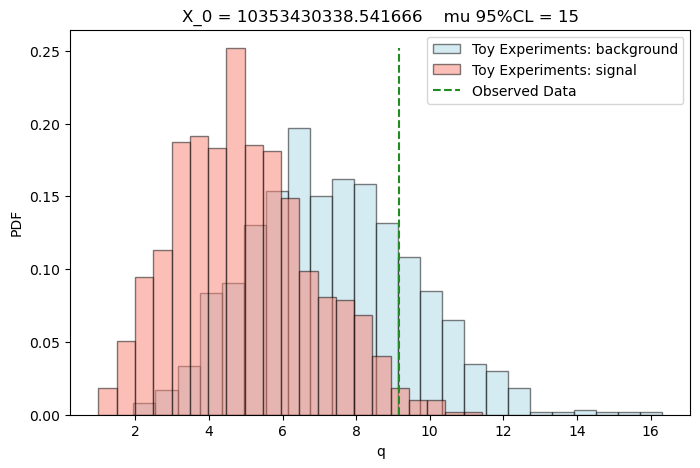

Mu:  67    q(mu)_obs = 154.9710430588284 
p_mu = 0.0   p_b = 0.185   ratio = 0.0 

Mu:  56    q(mu)_obs = 109.44202968911986 
p_mu = 0.0   p_b = 0.185   ratio = 0.0 

Mu:  50    q(mu)_obs = 87.92606867428935 
p_mu = 0.0   p_b = 0.185   ratio = 0.0 

Mu:  44    q(mu)_obs = 68.75481349307438 
p_mu = 0.0   p_b = 0.185   ratio = 0.0 

Mu:  33    q(mu)_obs = 39.70388018794506 
p_mu = 0.001   p_b = 0.185   ratio = 0.005405405405405406 

Mu:  26    q(mu)_obs = 25.329313607902805 
p_mu = 0.003   p_b = 0.185   ratio = 0.016216216216216217 

Mu:  15    q(mu)_obs = 9.211931783950149 
p_mu = 0.024   p_b = 0.185   ratio = 0.12972972972972974 



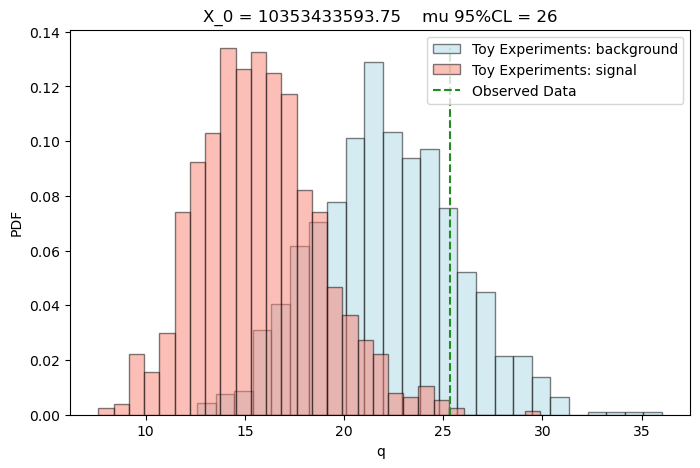

In [34]:
_, muCI = stat.stat_test(run=395, x_0=freq[range(0, 50,5)].values, mu_fix=mu_fix,
                         signal=fits.signal_gauss, n_toy=1000,
                         calc_z=False, calc_CI=True, draw=True, verbose=True, path='../db/')

In [35]:
muCI

array([50., 56., 67., 67., 44., 33., 26., 26., 15., 26.])

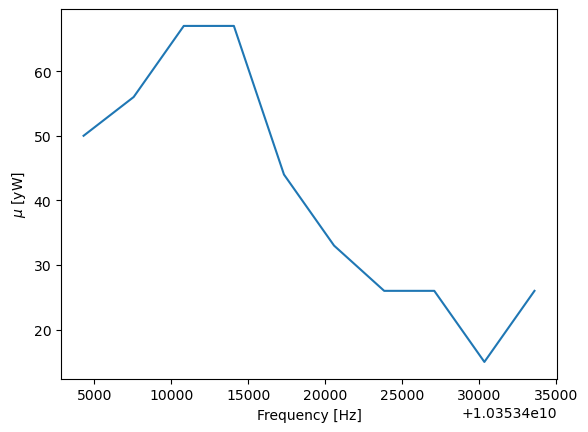

In [36]:
plt.plot(freq[range(0, 50, 5)].values, muCI)
plt.ylabel(r'$\mu$ [yW]')
plt.xlabel('Frequency [Hz]')
plt.show()

### $\mu$ 95% CL

Compute $\mu$ within 95% confidence level every 5*651 Hz for the run 395

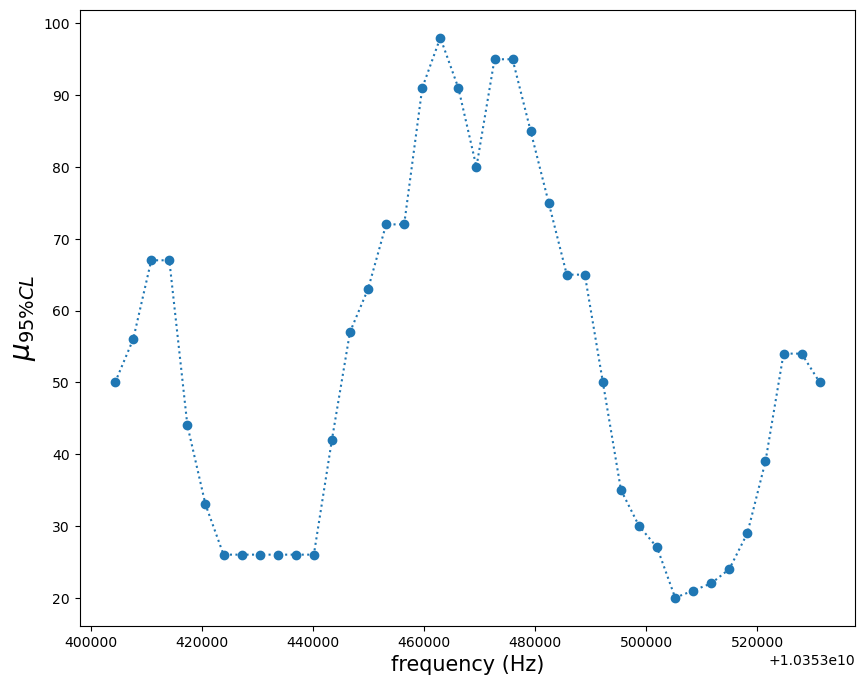

In [39]:
muCI1=np.array([50., 56., 67., 67., 44., 33., 26., 26., 26., 26.])
muCI2=np.array([26., 26., 42., 57., 63., 72., 72., 91., 98., 91.])
muCI3=np.array([80., 95., 95., 85., 75., 65., 65., 50., 35., 30.])
muCI4=np.array([27., 20., 21., 22., 24., 29., 39., 54., 54., 50.])
muCI_40values=np.array([muCI1,muCI2,muCI3,muCI4]).flatten()

freq_test=freq[(range(0,200,5))].values



fig,ax=plt.subplots(1,1,figsize=(10,8))

ax.scatter(freq_test,muCI_40values)
ax.plot(freq_test,muCI_40values,linestyle="dotted")
ax.set_xlabel("frequency (Hz)",size=15)
ax.set_ylabel(r'$\mu_{95\%CL}$',size=20)

plt.show()